In [1]:
import warnings
# Ignore all warnings (not recommended in general)
warnings.filterwarnings('ignore')

# Regressors

In [2]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('cat_food_prepared.csv')

# Show general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         164 non-null    object 
 1   price           164 non-null    float64
 2   weight          164 non-null    float64
 3   star_rating     164 non-null    float64
 4   total_comments  164 non-null    float64
 5   chicken         164 non-null    int64  
 6   from_ocean      164 non-null    int64  
 7   fish            164 non-null    int64  
 8   tuna            164 non-null    int64  
 9   salmon          164 non-null    int64  
 10  mackerel        164 non-null    int64  
 11  shrimps         164 non-null    int64  
 12  liver           164 non-null    int64  
 13  turkey          164 non-null    int64  
 14  ham             164 non-null    int64  
 15  vegan           164 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 20.6+ KB


In [3]:
row = ['whiskas', 'farmina', 'me-o', 'royal', 'purepet', 'purina', 'meat', 'sheba']

# Step 1: Use the Pandas 'get_dummies' function for one-hot encoding
data = pd.get_dummies(data[data.company.isin(row)], columns=['company'])

data.shape

(121, 23)

In [4]:
data.head(5)

,price,weight,star_rating,total_comments,chicken,from_ocean,fish,tuna,salmon,mackerel,...,ham,vegan,company_farmina,company_me-o,company_meat,company_purepet,company_purina,company_royal,company_sheba,company_whiskas
0,189.0,1.2,4.2,8285.0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,879.0,7.0,4.3,11737.0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1900.0,7.0,4.5,8056.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,429.0,2.4,4.0,4522.0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,369.0,1.1,4.5,12982.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = ['price', 'weight', 'total_comments', 'star_rating']  # Replace with your actual numerical columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data.head(5)

,price,weight,star_rating,total_comments,chicken,from_ocean,fish,tuna,salmon,mackerel,...,ham,vegan,company_farmina,company_me-o,company_meat,company_purepet,company_purina,company_royal,company_sheba,company_whiskas
0,0.022888,0.113797,0.60,0.638163,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.128879,0.697885,0.65,0.904091,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.285714,0.697885,0.75,0.620522,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.059754,0.234642,0.50,0.348278,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0.050538,0.103726,0.75,1.000000,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
data.to_csv('catfood_prepared.csv', index=False)

In [7]:
# 1. Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# 2. Prepare the dataset
# Assuming 'data' is already loaded and cleaned
# Replace 'feature1', 'feature2', ... with actual feature names
features = data.drop(columns=['star_rating'])
target = data['star_rating']

# 5. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 6. Train a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# 7. Make predictions
y_pred = regressor.predict(X_test)

# 8. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# 9. Optional: Display model coefficients
coef_df = pd.DataFrame({'Feature': features.columns, 'Coefficient': regressor.coef_})
print(coef_df)


Mean Squared Error (MSE): 0.04
R² Score: 0.31
            Feature   Coefficient
0             price -9.635611e-02
1            weight  2.300646e-01
2    total_comments -7.547160e-02
3           chicken  1.001297e-02
4        from_ocean  5.433031e-02
5              fish  3.536182e-03
6              tuna  1.612317e-02
7            salmon -3.688286e-02
8          mackerel -1.385418e-02
9           shrimps -6.938894e-18
10            liver -3.001760e-01
11           turkey  2.775558e-17
12              ham -6.938894e-18
13            vegan  2.189476e-02
14  company_farmina  7.776098e-02
15     company_me-o -2.775995e-02
16     company_meat -4.582639e-02
17  company_purepet -1.456759e-01
18   company_purina -1.410312e-01
19    company_royal  1.198313e-01
20    company_sheba  9.576983e-02
21  company_whiskas  6.693132e-02


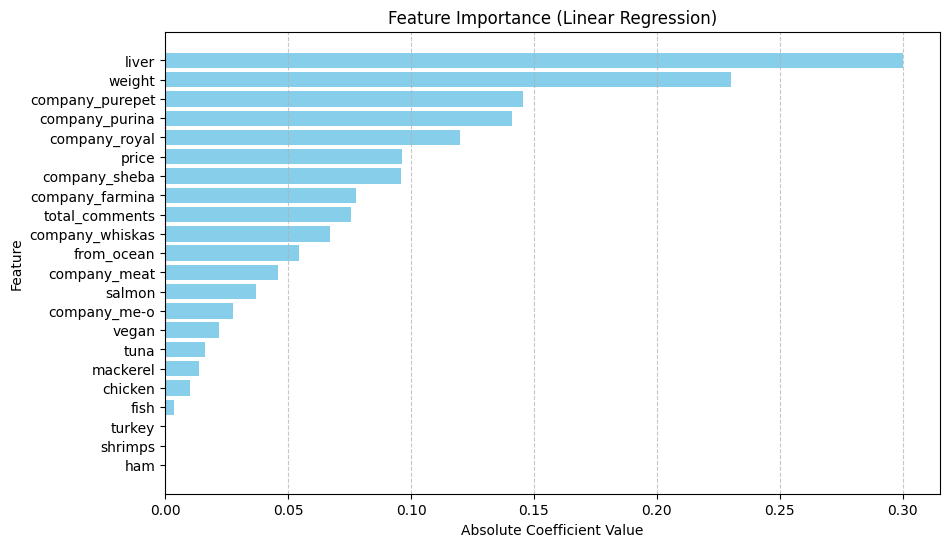

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature names and coefficients
features = features.columns  # Features used in the model
coefficients = regressor.coef_  # Coefficients from the linear model

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
feature_importance['Absolute_Coefficient'] = np.abs(feature_importance['Coefficient'])

# Sort by absolute importance
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Absolute_Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Linear Regression)')
plt.gca().invert_yaxis()  # To display top features first
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


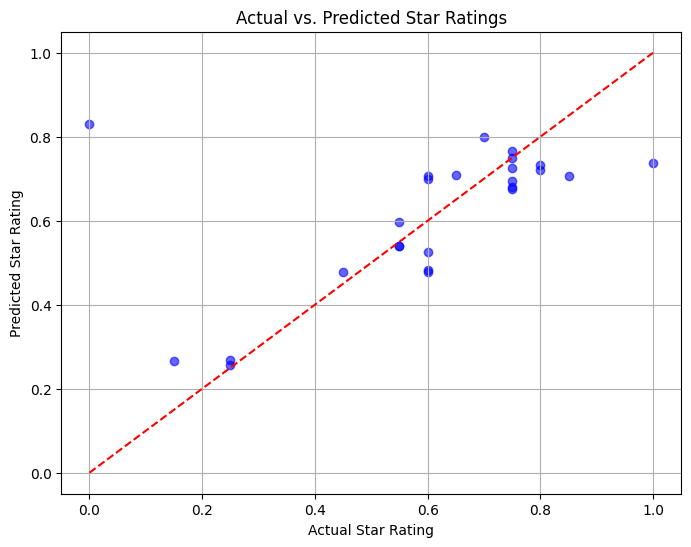

In [9]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Line y = x for reference
plt.xlabel('Actual Star Rating')
plt.ylabel('Predicted Star Rating')
plt.title('Actual vs. Predicted Star Ratings')
plt.grid(True)
plt.show()


In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# List of models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR": SVR(),
    "KNN Regressor": KNeighborsRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Dictionary to store results
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_model = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred_model)
    r2 = r2_score(y_test, y_pred_model)
    
    # Store results
    results[model_name] = {"MSE": mse, "R²": r2}

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)


                        MSE        R²
Linear Regression  0.035539  0.309873
Decision Tree      0.063100 -0.225338
Random Forest      0.052888 -0.027026
SVR                0.055942 -0.086343
KNN Regressor      0.041580  0.192559
Gradient Boosting  0.054666 -0.061551


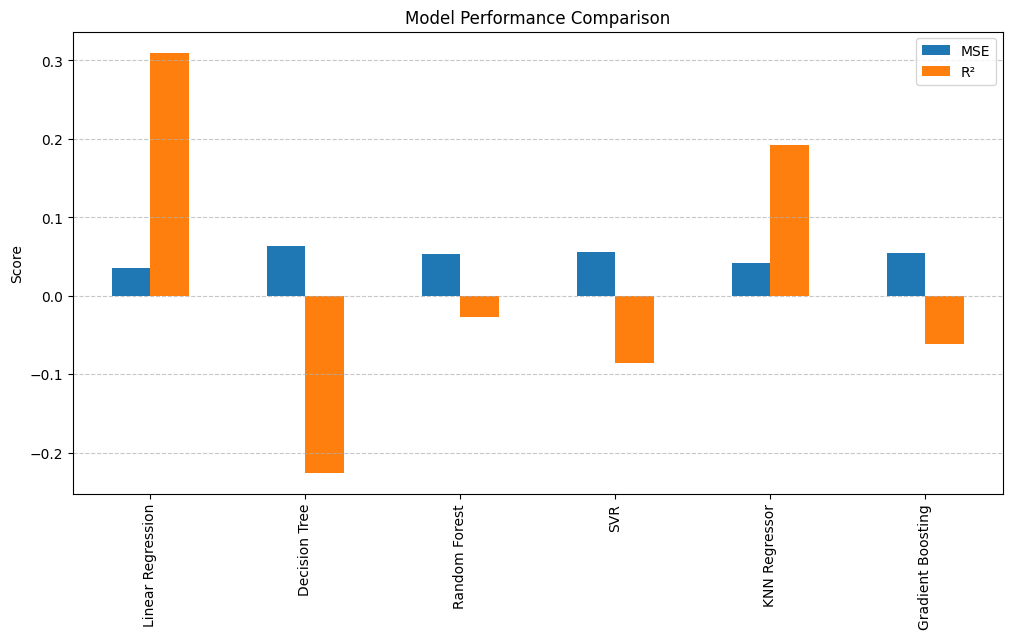

In [11]:
# Plotting model comparison
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
